In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from sklearn.model_selection import train_test_split
from kernel import Evaluator

In [2]:
print('Loading Dataset...')
train = pd.read_csv("train.tsv", sep='\t')
test = pd.read_csv("test.tsv", sep='\t')
print('Dataset loaded!...')

Loading Dataset...
Dataset loaded!...


In [3]:
X = train.loc[:, train.columns!='price']
y = train.loc[:, ['price']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Now we're going to create a simple classifier which has only item_condition_id and shipping. Train it, then test it from there. And then look at the score.

In [4]:
S_train = X_train.loc[:, ['item_condition_id', 'shipping']]
S_test = X_test.loc[:, ['item_condition_id', 'shipping']]

In [19]:
# Fit Regressor to the Data
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [23]:
regr_1.fit(S_train, np.log1p(y_train))
regr_2.fit(S_train, np.log1p(y_train))

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [24]:
# Find the feature importances of these regressors
print(regr_1.feature_importances_)
print(regr_2.feature_importances_)

[ 0.09851607  0.90148393]
[ 0.11056015  0.88943985]


In [26]:
train_predict_1 = regr_1.predict(S_train)
train_predict_2 = regr_2.predict(S_train)
ev_train = Evaluator(y_train.values)
train_score_1 = ev_train.rmsle_loop(np.expm1(train_predict_1))
train_score_2 = ev_train.rmsle_loop(np.expm1(train_predict_2))
print(train_score_1, train_score_2)

0.7266657151210284 0.7263595037821312


In [27]:
y_1 = regr_1.predict(S_test)
y_2 = regr_2.predict(S_test)

In [28]:
ev = Evaluator(y_test.values)
# print(dir(ev))
score = ev.rmsle_loop(np.expm1(y_1))
score_2 = ev.rmsle_loop(np.expm1(y_2))
print(score, score_2)

0.7274138514434257 0.7271204069294004


We got an evaluation score of 0.7997 for the regressor of `max_depth` 2 and that of 0.7993 for the regressor of `max_depth` of 5. Not bad. <br>Now let's try to explore the dataset

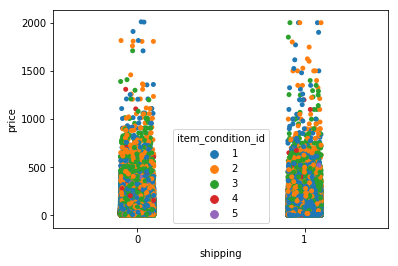

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

iris = sns.load_dataset('iris')
# Plot relationship between Shipping and Price, and Jitter it.
sns.stripplot(x=S_train['shipping'], y=y_train['price'], hue=S_train['item_condition_id'], jitter=True)

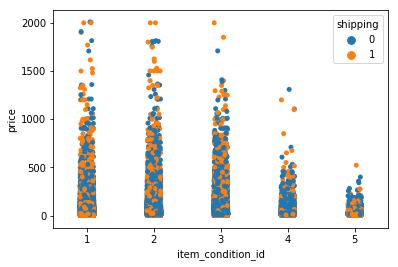

In [32]:
# Plot relationship between Item Condition and Price, and Jitter it.
sns.stripplot(x=S_train['item_condition_id'], y=y_train['price'], hue=S_train['shipping'], jitter=True)